#LBCC TUTORING CENTER WAIT TIMES

In [63]:
data = read.csv(file = "~/Documents/LBCC/fall15_DLA.csv")

tail(data)

,ID,table_num,s_name,dla_num,time_in,reviewer,time_review,time_done,t_day,app_time,time_int,Signed
41062,42209,4,Karen Robles,158,9:30:49 AM,Abraham Ruiz,9:34:58 AM,9:48:47 AM,10/16/2015,9:00:00 AM,9:30:00 AM,1
41063,42210,1,Lizandra Salazar,102,9:35:35 AM,Mardi Youphon,9:35:40 AM,9:46:32 AM,10/16/2015,,9:30:00 AM,1
41064,42211,15,Solomon Ikahihifo,103,9:41:59 AM,Jeremy Chan,9:42:09 AM,9:52:09 AM,10/16/2015,,9:30:00 AM,1
41065,42212,1,Amber Ramirez,146,9:51:23 AM,Mardi Youphon,9:51:39 AM,,10/16/2015,,9:30:00 AM,0
41066,42213,9,Eduardo Cisneros,202,10:03:11 AM,Steven Mao,10:03:17 AM,,10/16/2015,,10:00:00 AM,0
41067,42214,10,Leilani Melara,103,10:04:00 AM,,,,10/16/2015,,10:00:00 AM,0


In [64]:
class(data)
sum(as.character(data[data$app_time != "",'app_time']) != '')

[1] "data.frame"

[1] 7333

####Drop Observations with Appointment Times

In [65]:
data <- data[data$app_time == "",]
dim(data)

[1] 33734    12

####Convert to Standard Time Formats

In [66]:
data$time_in <- as.character(data$time_in)
data$time_review <- as.character(data$time_review)
data$time_done <- as.character(data$time_done)

In [67]:
data$time_in <- paste(data$t_day, data$time_in)
data$time_review <- paste(data$t_day, data$time_review)
data$time_done <- paste(data$t_day, data$time_done)

print(head(data$time_in))
print(head(data$time_review))
print(head(data$time_done))

[1] "9/3/2013 8:25:20 AM" "9/3/2013 8:35:20 AM" "9/3/2013 8:45:32 AM"
[4] "9/3/2013 8:50:17 AM" "9/3/2013 9:34:18 AM" "9/3/2013 9:35:52 AM"
[1] "9/3/2013 8:26:43 AM" "9/3/2013 8:35:30 AM" "9/3/2013 8:47:01 AM"
[4] "9/3/2013 9:02:34 AM" "9/3/2013 9:34:48 AM" "9/3/2013 9:45:00 AM"
[1] "9/3/2013 8:42:26 AM"  "9/3/2013 8:59:54 AM"  "9/3/2013 9:01:57 AM" 
[4] "9/3/2013 9:26:27 AM"  "9/3/2013 9:41:00 AM"  "9/3/2013 10:06:01 AM"


In [68]:
data$time_in <- strptime(data$time_in, format = '%m/%d/%Y %I:%M:%S %p')
data$time_review <- strptime(data$time_review, format = '%m/%d/%Y %I:%M:%S %p')
data$time_done <- strptime(data$time_done, format = '%m/%d/%Y %I:%M:%S %p')

print(head(data$time_in))
print(head(data$time_review))
print(head(data$time_done))

[1] "2013-09-03 08:25:20 PDT" "2013-09-03 08:35:20 PDT"
[3] "2013-09-03 08:45:32 PDT" "2013-09-03 08:50:17 PDT"
[5] "2013-09-03 09:34:18 PDT" "2013-09-03 09:35:52 PDT"
[1] "2013-09-03 08:26:43 PDT" "2013-09-03 08:35:30 PDT"
[3] "2013-09-03 08:47:01 PDT" "2013-09-03 09:02:34 PDT"
[5] "2013-09-03 09:34:48 PDT" "2013-09-03 09:45:00 PDT"
[1] "2013-09-03 08:42:26 PDT" "2013-09-03 08:59:54 PDT"
[3] "2013-09-03 09:01:57 PDT" "2013-09-03 09:26:27 PDT"
[5] "2013-09-03 09:41:00 PDT" "2013-09-03 10:06:01 PDT"


In [69]:
data[,'t_day'] <- as.Date(data[,'t_day'], "%m/%d/%Y")

In [70]:
head(data[,'t_day'])

[1] "2013-09-03" "2013-09-03" "2013-09-03" "2013-09-03" "2013-09-03"
[6] "2013-09-03"

####Subset to get Fall data

In [71]:
fall14 <- data[data$t_day >= "2014-08-25" & data$t_day <= "2014-10-18",]
fall14$PERIOD <- 'Fall 2014'
fall15 <- data[data$t_day >= "2015-08-24" & data$t_day <= "2015-10-16",]
fall15$PERIOD <- 'Fall 2015'

data <- rbind(fall14,fall15)

dim(fall14)
dim(fall15)

[1] 3825   13

[1] 3463   13

####Wait Time Analysis

In [72]:
WAIT <- as.numeric(data$time_review - data$time_in)/60
PERIOD <- data$PERIOD

In [73]:
x <- data.frame(PERIOD, WAIT)
str(x)

'data.frame':	7288 obs. of  2 variables:
 $ PERIOD: Factor w/ 2 levels "Fall 2014","Fall 2015": 1 1 1 1 1 1 1 1 1 1 ...
 $ WAIT  : num  0.533 1.4 2.15 15.2 15.517 ...


####Note: wait times are in minutes

In [74]:
head(x)

,PERIOD,WAIT
1,Fall 2014,0.5333333
2,Fall 2014,1.4
3,Fall 2014,2.15
4,Fall 2014,15.2
5,Fall 2014,15.51667
6,Fall 2014,0.45


In [75]:
require(gplots)

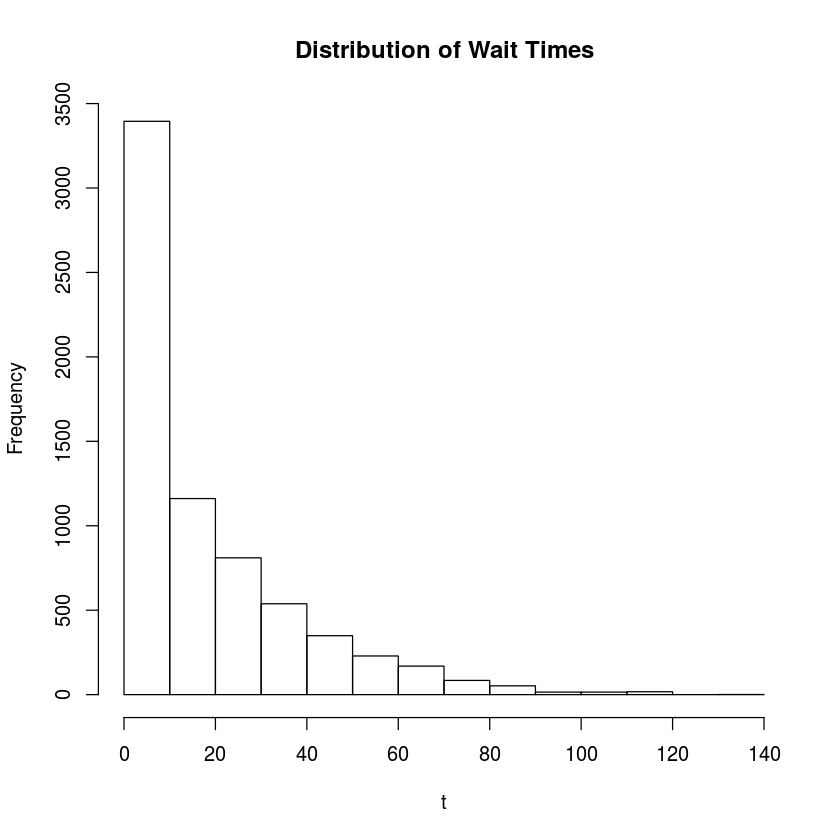

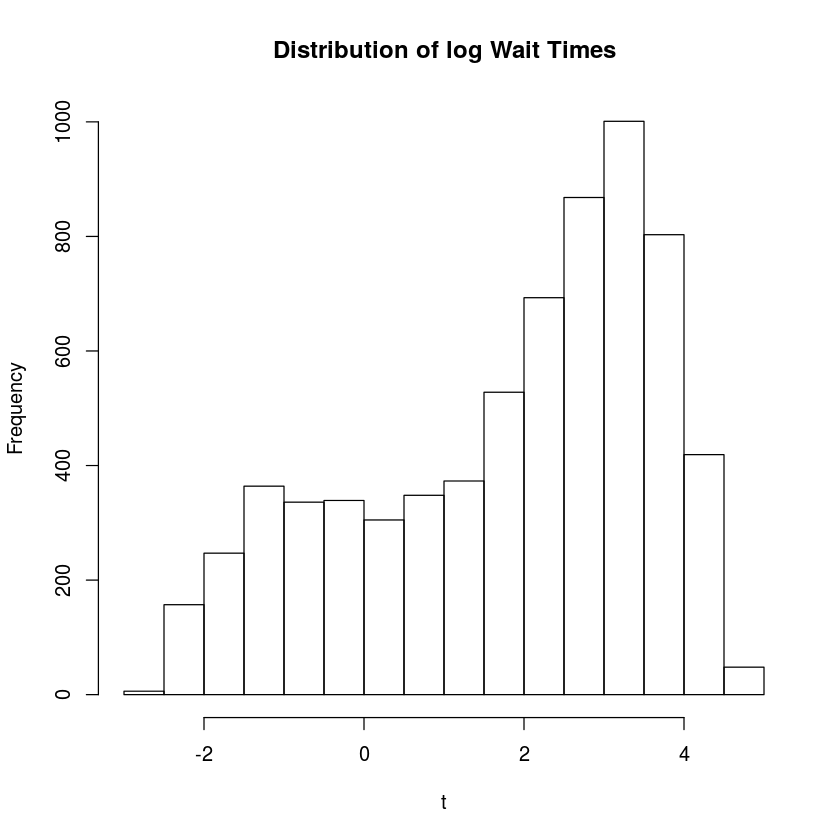

In [76]:
hist(x$WAIT, main = 'Distribution of Wait Times', xlab = 't')
hist(log(x$WAIT), main = 'Distribution of log Wait Times', xlab = 't')

####The ANOVA model indicates that there is a significant statistical difference in mean DLA wait times between the 2014 and 2015.

In [77]:
fit <-aov(log(WAIT) ~ PERIOD, data = x)
summary(fit)

              Df Sum Sq Mean Sq F value Pr(>F)    
PERIOD         1    340   340.2   103.3 <2e-16 ***
Residuals   6833  22501     3.3                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
453 observations deleted due to missingness

####The 95% confidence intervals do not overlap. This confirms statistical difference in mean wait times.

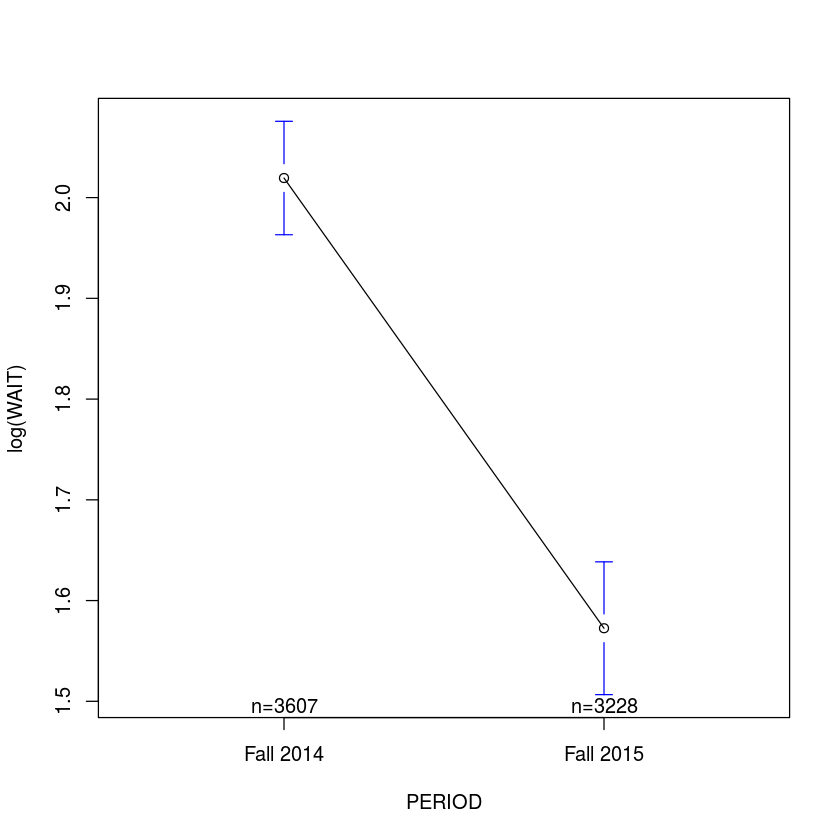

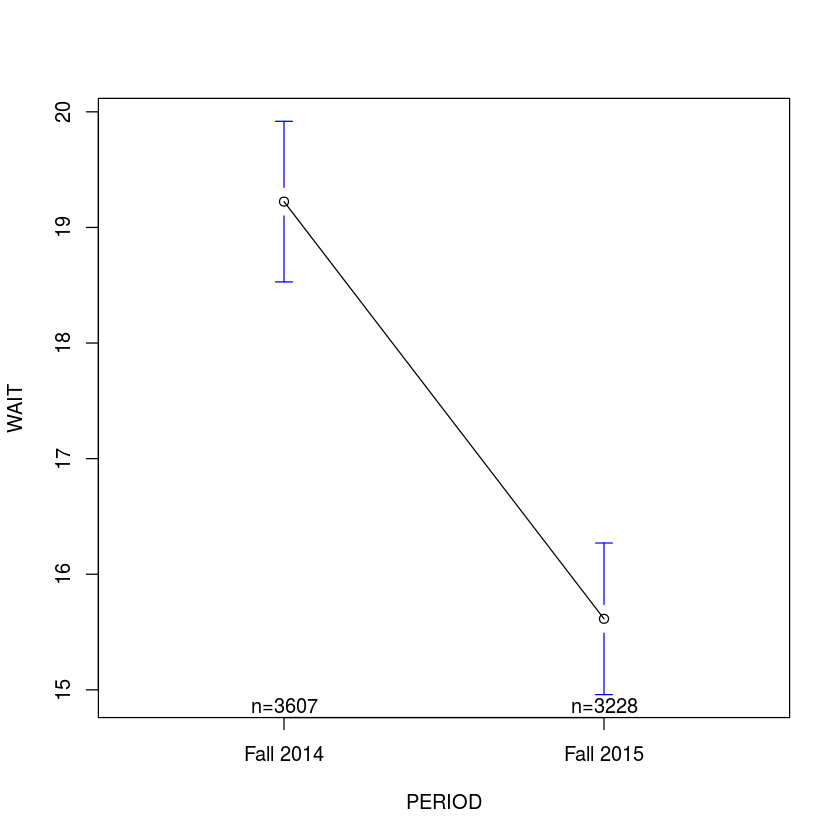

In [78]:
plotmeans(log(WAIT) ~ PERIOD, data = x)
plotmeans(WAIT ~ PERIOD, data = x)

In [79]:
mean(x[x[,'PERIOD'] == 'Fall 2014',2],na.rm = T)

[1] 19.22333

In [80]:
mean(x[x[,'PERIOD'] == 'Fall 2015',2],na.rm = T)

[1] 15.61432